<a href="https://colab.research.google.com/github/ZakiKurdya/Predictive-Maintenance/blob/main/notebooks/modeling_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science CSCI 3320 Final Project** | Predictive Maintenance Dataset ⚙️

---

© Zaki Kurdya

<a href="https://github.com/ZakiKurdya/Predictive-Maintenance">
<img src="https://cdn-icons-png.flaticon.com/512/25/25231.png" alt="github repository" width=35></a>

<a href="https://colab.research.google.com/drive/1DDEsCd9cCICfcxJQJMmKq9yyMYXAl3et?usp=sharing">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Google_Colaboratory_SVG_Logo.svg/1200px-Google_Colaboratory_SVG_Logo.svg.png" width=65>
</a>

# **Modeling** 🧪

## **Load the cleaned dataset** 🔃

In [ ]:
!pip install imblearn --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

df = pd.read_csv('https://raw.githubusercontent.com/ZakiKurdya/Predictive-Maintenance/main/dataset/cleaned_dataset.csv')

In [ ]:
df.head(3)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

## **Data splitting and sampling** 🧮

In [ ]:
df.columns

Split the dataset (70% train : 30% test)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

Because the data is imbalanced, we oversample the training set

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE(random_state = 42)
#oversample = RandomOverSampler(random_state = 42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

Training set after oversampling

In [ ]:
plt.hist(y_train)

## **Decision Tree Model**

Build the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [ ]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Decision Tree model

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

In [ ]:
from sklearn.tree import export_text

rules = export_text(model)

# print the rules
print(rules)

In [ ]:
# save the model
pickle.dump(model, open('decision_tree_model.pkl', 'wb'))

## **k-NN (K-nearest neighbors) Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

Build the model

In [ ]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [21]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.51      0.49      0.50        74

    accuracy                           0.97      2820
   macro avg       0.75      0.74      0.74      2820
weighted avg       0.97      0.97      0.97      2820



C:\Users\zkord\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\zkord\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\zkord\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\zkord\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\zkord\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\zkord\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

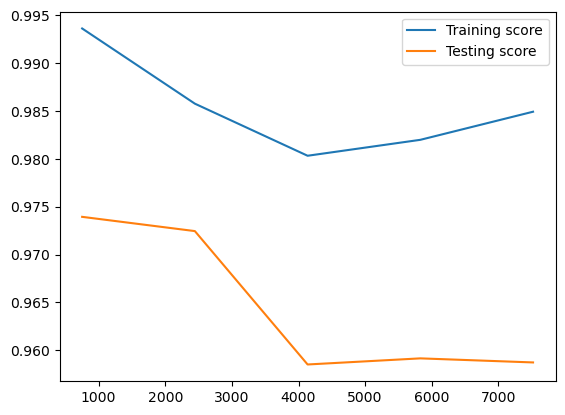

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of k-NN model

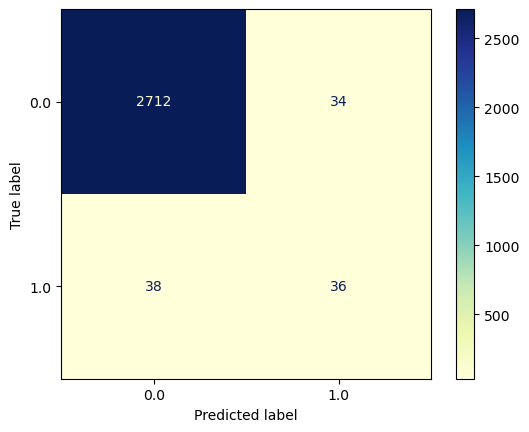

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

In [24]:
# save the model
pickle.dump(model, open('k-NN_model.pkl', 'wb'))

## **Random Forest Model**

Build the model

In [25]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure


In [26]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.61      0.62      0.61        74

    accuracy                           0.98      2820
   macro avg       0.80      0.81      0.80      2820
weighted avg       0.98      0.98      0.98      2820



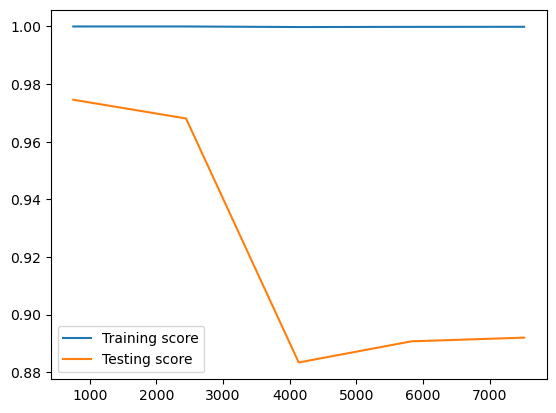

In [27]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Random Forest model

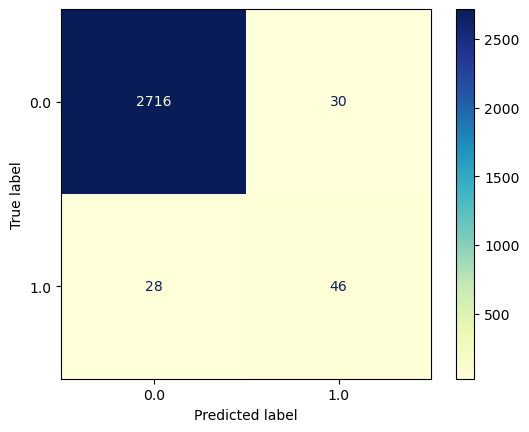

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

In [29]:
# save the model
pickle.dump(model, open('random_forest_model.pkl', 'wb'))

## **Gradient Boosting Model**

Build the model

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [32]:
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.43      0.74      0.54        74

    accuracy                           0.97      2820
   macro avg       0.71      0.86      0.76      2820
weighted avg       0.98      0.97      0.97      2820



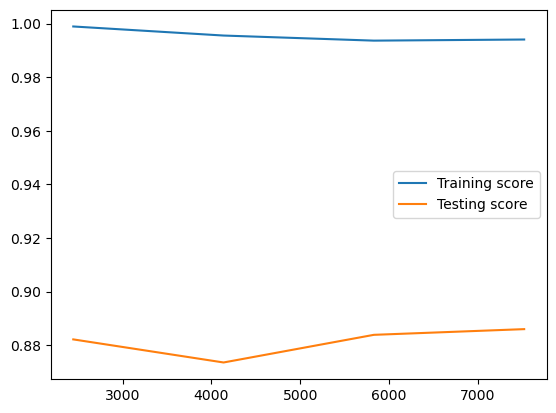

In [33]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Gradient Boosting model

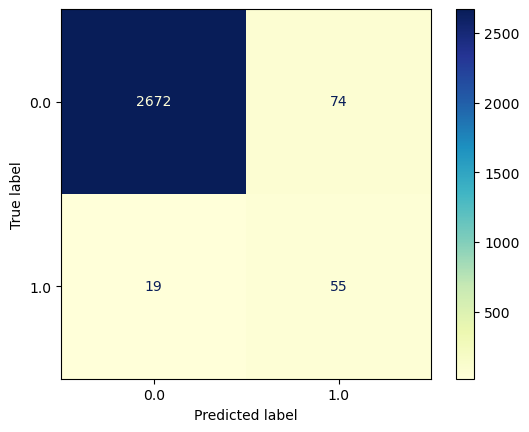

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

In [35]:
# save the model
pickle.dump(model, open('gradient_boosting_model.pkl', 'wb'))

## **Gaussian Naive Bayes Model**

Build the model

In [36]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [37]:
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      2746
         1.0       0.12      0.82      0.20        74

    accuracy                           0.83      2820
   macro avg       0.55      0.83      0.55      2820
weighted avg       0.97      0.83      0.89      2820



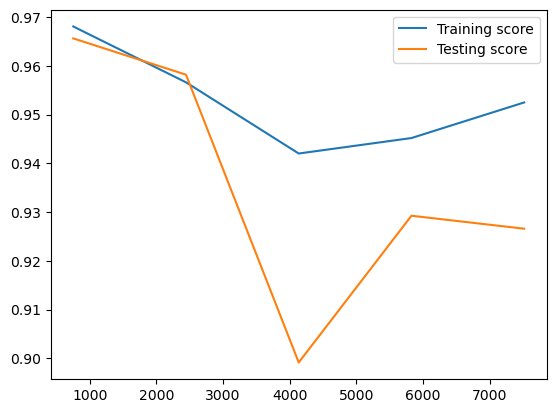

In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Gaussian Naive Bayes model

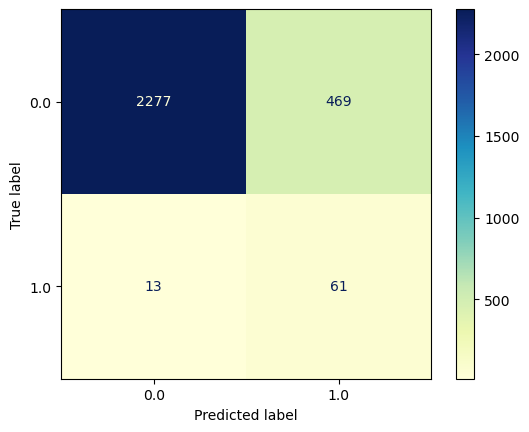

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

In [40]:
# save the model
pickle.dump(model, open('gaussian_naive_bayes_model.pkl', 'wb'))

## **MLP (Multi-layer Perceptron) Model**

Build the model

In [42]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [43]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2746
         1.0       0.51      0.74      0.61        74

    accuracy                           0.97      2820
   macro avg       0.75      0.86      0.80      2820
weighted avg       0.98      0.97      0.98      2820



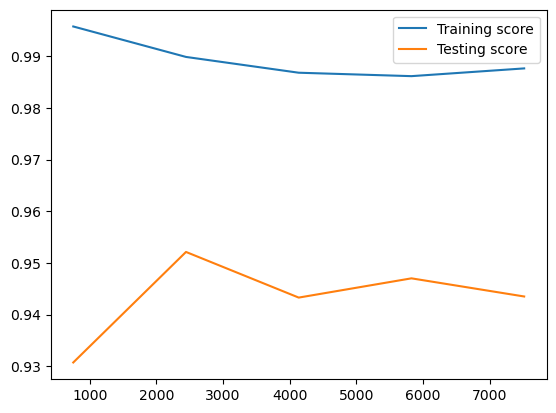

In [44]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

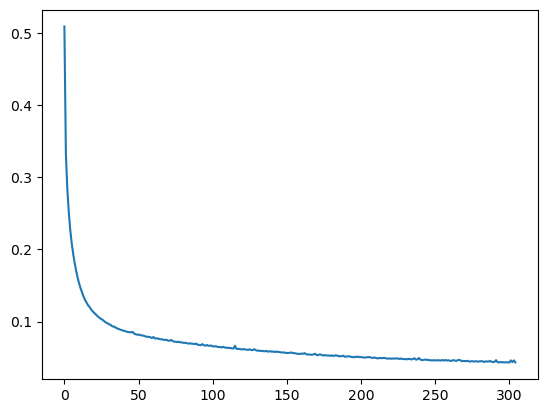

In [45]:
plt.plot(model.loss_curve_)

Confusion matrix of Multi-layer Perceptron model

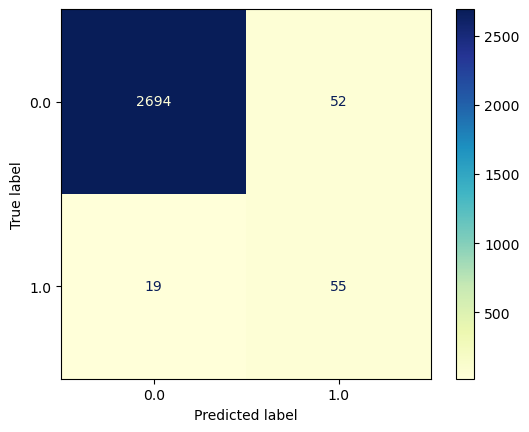

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [48]:
# save the model
pickle.dump(model, open('multi_layer_perceptron_model.pkl', 'wb'))

# **Evaluation** 🎲

In [47]:
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.963475,0.975646,0.963475,0.968361,0.085320,0.003587
k-NN,0.974468,0.973799,0.974468,0.974123,0.039526,0.149937
Random Forest,0.979433,0.979705,0.979433,0.979566,0.669830,0.081747
Gradient Boosting,0.967021,0.978072,0.967021,0.971322,2.578901,0.001064
Gaussian Naive Bayes,0.829078,0.971251,0.829078,0.885860,0.008516,0.000000
Multi-layer Perceptron,0.974823,0.980428,0.974823,0.977042,36.076761,0.008460
